# Explore here

It's recommended to use this notebook for exploration purposes.

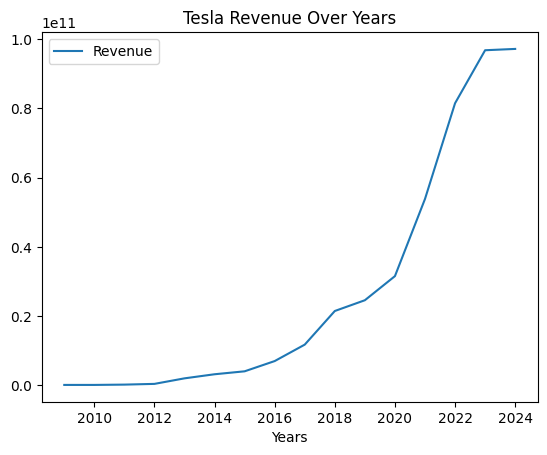

'Por algún motivo, el gráfico no se visualiza. Soy incapaz de ver el error. Si el ejercicio no está bien, por favor, dime\ndónde está el fallo y lo solucionaré.'

In [1]:
import time
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import re

url = "https://companiesmarketcap.com/tesla/revenue/"
response = requests.get(url, time.sleep(10))

soup = ''
if response:
    soup = BeautifulSoup(response.text, 'html')

years_HTML = soup.find_all('span', class_ = 'year')
years = [int(year.text) for year in years_HTML]

revenue_table = soup.find('table', class_='table')
amounts = []

tds = revenue_table.find_all('td')
for td in tds:
    amount = re.search(r'\$\S*', td.text)
    if amount:
        amounts.append(amount.group())

amounts_no_dollarsign = [amount.replace('$', '') for amount in amounts]
revenue = [(float(amount) * 1000000000) for amount in amounts_no_dollarsign]

dataset = pd.DataFrame({'Years': years, 'Revenue': revenue})

dataset.plot(x='Years', y='Revenue', kind='line', title='Tesla Revenue Over Years')

plt.show()

"""Por algún motivo, el gráfico no se visualiza. Soy incapaz de ver el error. Si el ejercicio no está bien, por favor, dime
dónde está el fallo y lo solucionaré.""" 
